# Домашнее задание по обработке текстов

Входные данные:
* Новости о компании "Газпром" с 2010 года

In [202]:
with open('gazprom.txt', encoding='utf-8') as f:
    raw = f.read()
    
news = raw.split('--------------------------------------------------------------------------')

len(news)

2393

In [204]:
import re

def month_to_num(word):
    months = ['января','февраля','марта','апреля','мая','июня','июля','августа','сентября','октября','ноября','декабря']
    res = months.index(word)+1
    if res < 10:
        res = '0'+str(res)
    return(str(res))

def extract_date(news):
    regexp_date = re.compile('Опубликовано\s[0-9]{1,2}\s[А-Яа-я]+\s201\d') 
    date_raw = regexp_date.findall(news)[0].lower().split()[1:]
    date = str(date_raw[0])+'.'+month_to_num(date_raw[1])+'.'+str(date_raw[2])
    return(date)

extract_date(news[0])

'09.11.2017'

In [205]:
def extract_text(news):
    parts = news.split('\n')
    return (parts[0]+' '+parts[-2])

print(extract_text(news[0]))

Компания рассчитывает на решение по газовому спору с Украиной до конца декабря «Газпром» ожидает решения Стокгольмского арбитража по транзитному спору с украинским «Нафтогазом» не позднее февраля 2018 года, хотя раньше компания прогнозировала, что это произойдет до 30 ноября. Решение по взаимным искам об условиях поставок газа на Украину, по мнению монополии, суд может принять на месяц раньше — до декабря 2017 года.


In [206]:
events_by_date = {}

for n in news:
    date = extract_date(n)
    if date in events_by_date.keys():
        events_by_date[date] += ('\n'+extract_text(n))
    else:
        events_by_date[date] = extract_text(n)
    

In [207]:
import pandas as pd

df = pd.DataFrame.from_dict(events_by_date, orient='index')
df = df.reset_index()
df.columns = ['date', 'text']
df.to_csv('texts.csv', index=False, encoding='utf-8')

In [208]:
df = pd.read_csv('texts.csv')

In [209]:
df.head()

,date,text
0,09.11.2017,Компания рассчитывает на решение по газовому с...
1,08.11.2017,"Как и предполагал “Ъ”, «Газпром», воспользова..."
2,01.11.2017,Новая редакция американских санкций ставит по...
3,30.10.2017,"Как стало известно “Ъ”, известный на рынке ри..."
4,23.10.2017,"НОВАТЭК, который через пять лет собирается за..."


In [210]:
df = df.iloc[::-1]
df.head(10)

,date,text
1202,04.01.2010,
1201,11.01.2010,Спорные вопросы по оплате за оказанные в пери...
1200,19.01.2010,"""Газпром"" готов забирать весь объем азербайдж..."
1199,28.01.2010,"Консорциум во главе с российским ОАО ""Газпром..."
1198,01.02.2010,"""Газпром"" не исключает в 2010 г. выпуска обли..."
1197,03.02.2010,"Переговоры ОАО ""Газпром"" с оператором проекта..."
1196,04.02.2010,"Российский газовый монополист – компания ""Газ..."
1195,15.02.2010,"Российский ""Газпром"" сообщил о планах увеличе..."
1194,10.03.2010,"Подконтрольный ""Газпрому"" нефтедобытчик ""Газп..."
1193,22.03.2010,"""Газпром"" назвал участников конкурса по отбор..."


проведем токенизацию текстов

In [211]:
import re
regex = re.compile("[А-Яа-я----]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

удалим стоп-слова

In [212]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', '-', '-']

print(mystopwords)
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
df.text = df.text.apply(remove_stopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

лемматизация

In [144]:
from pymystem3 import Mystem

m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "



In [146]:
for i,j in enumerate(df.text):
    df.text[i] = lemmatize(df.text[i])
    print(df.text[i])

компания рассчитывать решение газовый спор украина конец декабрь газпром ожидать решение стокгольмский арбитраж транзитный спор украинский нафтогаз поздно февраль год хотя рано компания прогнозировать происходить ноябрь решение взаимный иск условие поставка газ украина мнение монополия суд принимать месяц рано декабрь год
предполагать ъ газпром воспользоваться жалоба иностранный партнер налогообложение добычный проект рф смочь добиваться снижение налог добыча полезный ископаемое ндпи свой ачимовский залежи уровень независимый производитель газ этот льгота распространяться сп газпром структура монополия разрабатывать месторождение запас трлн кубометр газ расчет ъ приводить тот год платеж ндпи газпром ачимовский сп снижаться руб который руб сэкономить сам монополия
новый редакция американский санкция ставить угроза зарубежный нефтяной проект российский компания американский гражданин компания запрещать иначе участвовать разработка определенный тип нефтяной месторождение россия смочь помо

уход пост канцлер фрг ангел меркель собираться занимать какой-либо значимый должность бизнес заявлять вопрос согражданин онлайн-трансляция журнал добавлять понравиться вести предшественник герхард шредер делать отмечать недавно шредер получать предложение входить совет директор роснефть вскоре отставка пост канцлер переходить оператор газопровод северный поток октябрь г возглавлять совет директор
газпром уверенно идти новый абсолютный экспортный рекорд данные ъ монополия рассчитывать поставлять рубеж итог год кубометр газ основной конкурент газпром европейский рынок норвегия алжир поставщик сжижать природный газ спг наращивать поставка меньший темп результат первый полугодие расчет ъ доля российский газ потребление ес увеличиваться менее резкий сокращение азиатский премия приводить перенаправление часть спг азия европа осложнять газпром удержание доля рынок российский компания наращивать доля крупный сербский производитель нефтехимия газпром нефть лукойл получать соответственно результ

газпром собираться начинать поставка газ китай сила сибирь конец год минимум год рано запуск амурский гпз означать первый газ кнр очищать гелий этан товарный состояние мнение аналитик источник ъ китай который исходный хотеть перерабатывать российский газ вариант выгодно
минприроды готовый год предоставлять льгота утилизация попутный нефтяной газ пнг нефтяник работать труднодоступный район главный образ шельф арктика компания угроза штраф мочь сжигать пнг итог главный выгодоприобретатель льгота мочь становиться роснефть газпром
газпром счесть недостаточный аргументация стокгольмский арбитраж спор нафтогаз украина хотя сальдо взаимный требование положительный российский компания российский монополия оспаривать решение шведский суд мнение юрист газпром пытаться доказывать арбитр выходить предел полномочие цель газпром становиться давление нафтогаз который идти переговоры именно практика применять принцип излагать предварительный решение
газпром оспаривать промежуточный решение стокгольмск

выручка холдинг газпром-медиа управляющий телеканал тнт нтв матч тв студия дистрибутор кино централ партнершип др первый квартал вырастать руб убыток руб год ранее смениться чистый прибыль руб холдинг объяснять увеличение доход развлекательный телеканал кинобизнес матч тв газпром подымать оценка добыча газ г куб м примерно куб м сообщать сегодня представитель центральный производственный-диспетчерский департамент газпром георгий кучерявенко украинский аналог российский служба судебный пристав департамент государственный исполнительный служба министерство юстиция потребовать газпром гривна руб курс май г налагать арест акция украинский компания газтранзит сообщать газпром постановление департамент открывать отношение газпром исполнительный производство май передавать представительство российский компания киев
газпром сообщение встреча глава компания алексей миллер член исполнительный комитет маартен ветселаар впервые долгий время затрагивать вопрос выполнение соглашение сотрудничество г

совет директор нефть согласовывать привлечение кредит уралсиб сумма руб говориться сообщение газпром нефть национальный рекламный альянс нра главный продавец реклама российский телевидение смениться гендиректор вместо оганес соболева компания возглавлять сергей васильев многолетний руководитель предшественник нра селлер среди причина перестановка фон рост продажа альянс источник ъ указывать конфигурация селлер который оказываться сложно управлять неудовлетворительный заполняемость реклама ряд канал включая входить газпром-медиа
газпромбанк привлекать новый банк участие синдицировать кредит руб выделять государственный транспортный лизинговый компания гтлк закупка самолет данные ъ соорганизатор кредит быть вбрр китайский учет докапитализация гтлк год общий сумма который должный получать закупка авиатехник составлять руб
газпром требовать итальянский подрядчик который вести спор арбитраж париж убыток контракт прокладка морской часть качество встречный претензия который начинать судебный 

газпром ожидать фон подорожание нефть цена российский газ европеец год увеличиваться кубометр компания продолжать называть европа приоритетный рынок надеяться год газпром удерживать доля рынок предел оао ржд получать проектный компания который мечесть газпромбанк гпб вносить железнодорожный ветка эльгинский угольный месторождение бама окончательный вариант сделка именно он склоняться монополия
пакет акция пао переходить баланс голландский компания группа газпром собственность кипрский
газпром рамка сп разработка ачимовский залежи уренгойский месторождение поделиться европейский партнер свой доход экспорт газ следовать данные газпром закупать часть добывать месторождение газ экспортный цена европа гораздо дорого регулировать цена внутренний рынок рф мнение аналитик такой благоприятный европеец условие мочь объясняться внеэкономический причина
газпром заявлять начало коммерческий переговоры китайский трубопроводный поставка газ сахалин инфраструктура дальний восток частично перспектива п

газпром год собираться потратить около руб строительство экспортный газопровод полтора раз превосходить изначально предполагаться вклад проект акционер судя объем инвестиция монополия рассчитывать акционерный капитал проект обозримый перспектива входить европейский энергокомпания утверждать собеседник ъ газпром рассчитывать другой схема участие партнер финансирование пока расход ложиться российский компания который впервые год обеспечивать свой инвестиция счет свободный денежный поток вынуждать увеличивать долг выяснять ъ основной кредитор чтпз андрей комаров становиться втб газпромбанк гпб который предоставлять группа руб семь год рефинансирование синдицировать кредит руб сбербанк который приходиться четверть кредит выделять чтпз лишь руб пять год новый график долг выглядеть приемлемый учет перспектива продажа чтпз план рефинансировать часть долг облигация ключевой группа сегмент труба большой диаметр тбд волатилен предупреждать аналитик
телеканал руководитель который подыскивать неск

вчера россия украина брюссель смочь договариваться поставка российский газ предполагать ъ дискуссия подниматься вопрос отмена налагать газпром украина антимонопольный штраф киев готовый отказываться обмен устраивать схема поставка газ переговоры скоро возобновляться близко конец зима проблема заполнение украинский газохранилище становиться ощутимый
министр энергетика россия александр новак направлять еврокомиссар энергетика марош шефчович коллега ряд европейский страна получатель российский газ письмо который выражать озабоченность решение суд киев налагать газпром штраф размер иск антимонопольный комитет украина газпром подавать иск стокгольмский арбитраж решение хозяйственный суд киев который удовлетворять исковый требование антимонопольный комитет украина принудительный взыскание российский холдинг штраф размер гривна около передавать интерфакс ссылка источник знакомый ситуация соответствующий решение суд принимать начало текущий неделя сегодня брюссель возобновляться переговоры газ

фас заподозривать сибур газпром газэнергосеть завышение цена сжиженный углеводородный газ суг мнение ведомство причина рост цена биржа вне несколько становиться снижение поставка внутренний рынок разбалансировка компания уверять цена являться рыночный источник ъ отрасль пояснять колебание происходить сезонный каждый год начало следующий неделя газпром собираться проводить евробонд объем последний компания размещать бумага евро год назад аналогичный размер сентябрь газпром говорить наращивание программа заимствование руб занимать компания приходиться число из-за падение валютный выручка экспорт газ из-за снижение цена чистый прибыль головной компания пао газпром российский стандарт рсба месяц г упасть раз руб руб январь-сентябрь г свидетельствовать расчет интерфакс основа данные компания чистый прибыль головной компания пао газпром российский стандарт рсба месяц г упасть раз руб руб январь-сентябрь г свидетельствовать расчет интерфакс основа данные компания преддверие январь московский 

президент россия владимир путин поздравлять роснефть газпром запуск крупный восточный-мессояхский месторождение глава газпром алексей миллер пообещать проект приносить трлн руб налог год глава роснефть игорь сечина добавлять государство необходимо смягчать налоговый режим нефтяной отрасль проигрывать условие расти конкуренция производитель нефть
выяснять ъ обязанность заполнять дефицит госбюджет год распространяться газпром независимый производитель газ данные ъ минфин рассчитывать следующий год счет повышение ндпи газ получать дополнительно руб который около руб изымать независимый решение пока принимать полагать собеседник ъ новатэк роснефть газпром нефть наверняка постараться минимум снижать размер дополнительный выплата выяснять ъ обязанность заполнять дефицит госбюджет год распространяться газпром независимый производитель газ данные ъ минфин рассчитывать следующий год счет повышение ндпи газ получать дополнительно руб который около руб изымать независимый решение пока принимать п

газпром традиционно упрекать украина недостаточный темп закачка газ подземный хранилище приводить проблема транзит зима год киев впервые свой история обходиться вообще импорт газ рф риск холодный погода украина ес мощность подъем газ пхг хватить ударять имидж украина транзитер исключать газпром хотеть подталкивать нафтогаз украина покупка газ рф выгодно отражаться позиция газпром стокгольмский арбитраж газпром расформировывать департамент который возлагаться задача связывать реализация проект южный поток территория россия европа строительство морской магистраль интерфакс рассказывать несколько источник отрасль газпром вновь сокращать поставка газ европа транзит украина середина август из-за ремонт оба нитка газопровод газпром приходиться увеличивать заявка транзит вызывать недовольство украинский сторона суточный заявка монополия сокращаться биржевой цена газ торги сутки вперед август неожиданно резко вырастать максимум зимний месяц источник ъ рынок уверенный рост возникать из-за сделк

медиакоммуникационный союз мкс объединять медиа- телекоммуникационный компания избирать новый руководитель вместо замгендиректор стс медиа сергей петров президент организация становиться гендиректор входить газпром-медиа кинокомпания централ партнершип павел степанов господин петров избирать предправление мкс вместо оганес соболева
газпром смочь очередной обжаловать суд решение антимонопольный комитет украина наложение штраф размер причина становиться злоупотребление монопольный положение транзит газ украина год монополия признавать полномочие комитет сфера транзит решать пойти суд однако вслед первый два инстанция компания отказывать высокий хозяйственный суд украина газпром течение три месяц обращаться верховный суд
холдинг газпром-медиа впервые раскрывать финансовый показатель телеканал пятница прибыльность канал запущенный год назад рекордный рынок руб выходить год итог -го оказываться единственный среди эфирный канал холдинг включая нтв тнт кто удаваться наращивать доход выручка в

биржевой торговля газ проходить второй серьезный кризис год газпром грозить ограничивать продажа перевести другой биржа из-за разногласие независимый брокер правило учет газ фас выступать резко против план монополия данные ъ конфликт заключаться действие частный брокер входить противоречие интерес сбытовый компания газпром эксперт замечать конфликт становиться следствие появление реальный конкуренция сегмент неготовность этот инфраструктура рынок
газпром роснефть достигать определенный успех борьба раскрытие информация правительство разрешать участник тэк публиковать сведение внутригрупповой транзакция приобретение нефть газ сделка госнедвижимость получение кредит рубеж хотя отказываться вывести операция из-под действие закон закупка госкомпания последний биться расширение список исключение другой финансовый сделка
россия готовый предлагать словакия становиться транзитер российский газ венгрия балканы братислава выступать против бояться потерять год перенаправление российский транзит у

становиться известно ъ эксперт газпром завершать оценка проект балтийский спг инвестиция создание спг-завод мощность оцениваться хотеть проект он появляться партнер необязывающий меморандум сторона планировать подписывать пмэф июнь аналитик осторожно оценивать экономический привлекательность проект отмечать плохой конъюнктура рынок низкий цена спг период год
период январь апрель увеличивать экспорт газ дальний зарубежье сообщать журналист председатель правление пао газпром алексей миллер период январь апрель увеличивать экспорт газ дальний зарубежье сообщать журналист председатель правление пао газпром алексей миллер
совет директор газпром нефть рекомендовать акционер годовой собрание принимать решение выплата итог г дивиденд размер руб руб один акция учет выплачивать дивиденд итог первый полугодие г говориться сообщение компания
газпром последний неделя договариваться прекращение арбитражный разбирательство газовый контракт два участник проект немецкий французский отличие предыдущий с

газпром смочь продавать выставлять объем газ кубометр аукцион прибалтика поставлять конец год граница белоруссия литва аукцион позволять литва частично компенсировать отсутствие основный контракт газпром год монополия намерен реализовывать аукцион экспорт европа
федеральный агентство недропользование роснедра утвердить новый технологический схема проект приразломный согласно который период стабильный добыча приразломный месторождение увеличивать год рациональный бурение позволять увеличивать добыча нефть период раз говориться сообщение газпром нефть
компания газпром нхк узбекнефтегаз подписывать контракт закупка куб м узбекский газ текущий год прайм ссылка меморандум газпром новый выпуск еврооблигация декабрь г подписывать контракт нхк узбекнефтегаз покупка г узбекский газ объем куб м говориться документ
газпром разрывать контракт туркменгаз обвинять туркменский сторона создание условие прекращение сотрудничество передавать интерфакс европейский комиссия февраль г направлять газпром фо

газпром исключать участие реализация экспортный проект иран такой заявление выступать зампредседатель правление газпром александр медведев встреча инвестор нью-йорк сегодня исследовательский компания опубликовывать ежегодный рейтинг самый дорогой самый влиятельный компания мир самый дорогой компания год вновь становиться американский технологический корпорация самый влиятельный компания нынешний год топ- самый дорогой компания входить четыре российский сбербанк лукойл газпром мтс газпром ожидать дивидендный доходность г уровень около близко ведущий международный нефтяной газовый компания сообщаться презентация ко день инвестор компания газпром хотеть повышать цена газ частный турецкий импортер который давать скидка год источник ъ утверждать шаг связанный обострение российский-турецкий отношение сочетание текущий арбитраж отношение означать сохранение неопределенность второй величина экспортный рынок газпром мнение аналитик компания следовать осторожный потерять доля он происходить укра

газпром смочь продавать свой финский правительство финляндия который полностью консолидировать актив компания собираться выходить импортер прошлый год деятельность осложнять третий энергопакет сделка тормозиться переговоры контрактный цена который затем переходить судебный разбирательство накануне сессия стокгольмский арбитраж газпром соглашаться сделать финляндия небольшой скидка газпром смочь продавать свой финский правительство финляндия который полностью консолидировать актив компания собираться выходить импортер прошлый год деятельность осложнять третий энергопакет сделка тормозиться переговоры контрактный цена который затем переходить судебный разбирательство накануне сессия стокгольмский арбитраж газпром соглашаться сделать финляндия небольшой скидка
экспертный совет правительство обнаруживать недостаток нормативный база работа совет потребитель госмонополия задумывать учет интерес клиент регулировать компания принятие тарифный решение год однако полный мера зарабатывать ряд гос

газпром продолжать наращивать экспортный поставка итог октябрь вырастать год год из-за монополия переставать ограничивать объем свой европейский экспорт второй квартал целое рост поставка рубеж январь октябрь составлять
становиться известно ъ газпромбанк гпб уралвагонзавод увз искать инвестор угольный компания заречный год заречный планировать купить увз-логистик сделка закрывать удаваться из-за спор экс-генпрокурор украина геннадий васильев результат заречный выкупать частный лицо однако данные ъ де-факто контролировать увз гпб основной кредитор шахта находить покупатель актив текущий ситуация непросто считать аналитик
совет директор компания рассматривать вопрос покупка акция газпром нефть вторник октябрь писать информационный агентство интерфакс ссылка сообщение газпром заседание состояться форма заочный голосование ноябрь уточняться пресс-релиз
россия иран мочь договариваться своповый поставка газ считать правительство рф газпром мочь поставлять сырье север страна армения азербайдж

газпром немецкий газовый компания закрывать масштабный сделка обмен актив российский монополия получать трейдинговый компания европа доля добыча газ северный море отдавать партнер блокпакет проект разработка ачимовский залежи уренгой обмен который сторона пытаться договариваться несколько год становиться возможный газпром приглашать проект газопровод
сбербанк газпромбанк втб выдвигать свой вариант решение проблема обманывать дольщик сохранность деньги предлагаться ограничивать использование последний строительство жилье речь идти заморозок средство завершение строительство либо повышение банковский контроль распределение девелопера уверенный из-за подорожать кредит вслед они сам жилье
становиться известно ъ некогда крупный подрядчик газпром стройгазконсалтинг сгк май подконтрольный газпромбанк фонд илья щербович воспользоваться помощь монополия урегулирование долговой проблема газпром выкупать дочерний компания сгк газтехлизинг оборудование руб который должный пойти расчет кредитор общ

конфликт газпром миноритария газораспределительный организация гро требовать выкуп свой акция руб затягиваться неопределенный срок газпром который пока удаваться отбиваться суд цб настаивать выставление оферта перепродавать доля восемь компания свой дочерний оао газпром газораспределение считать эксперт миноритария цб приходиться заново запускать процедура требование выкуп акция прошлый судебный разбирательство затягиваться год
компания специальный назначение ооо спка создавать газпром инвестпроект газпром космический система реализация проект строительство сборочный производство космический аппарат возглавлять андрей афанасьев понедельник август сообщать интерфакс компания пресс-служба газпром космический система газпромбанк гпб резко свертывать программа рефинансирование валютный ипотека льготный курс едва успевать запускать конец июнь тот момент заемщик собирать необходимый документ курс доллар существенно вырастать вероятно банк счесть свой предложение слишком щедрый гпб предпочита

газпром доводить доля сообщать ссылка пресс-релиз газпром компания выкупать проект июль владелец тувинский энергетический промышленный корпорация тэпк руслан байсаров выкупать геннадий тимченко блокпакет строительный ск мост тэпк говорить актив нужный строительство железный дорога элегестский угольный месторождение тува деньги элегест руб привлекать пока удаваться предыдущий попытка господин байсарова купить крупный подрядчик стройгазконсалтинг срываться геннадий тимченко расставаться идея создание строительный холдинг выходить группа аркс оставлять стройтрансгаз
добыча газ группа газпром г упасть минимальный история компания куб м куб м г говориться июньский мониторинг минэкономразвития первоначальный план добыча газпром г составлять куб м последний оценка добыча газпром текущий год май куб м собственный добычный мощность компания составлять куб м гг компания выходить максимум добыча порядок куб м газ год роснано соглашаться продавать производитель антикоррозийный покрытие труба метак

газпром сообщать увеличивать экспорт газ германия июнь германия продолжать наращивать закупка российский газ июнь г экспорт газпром страна вырастать сравнение аналогичный период прошлый год говориться сообщение нк роснефть газпромбанк гпб завершать процедура вхождение консорциум дальневосточный центр судостроение судоремонт дцсс который входить ряд завод дальневосточный регион звезда момент наш задача активизировать работа реализация проект приводиться сообщение роснефть слово президент компания игорь сечин
московский нпз вторник июнь возобновлять работа установка риформинг который останавливать из-за возникать неисправность сообщать пресс-служба завод ремонтный работа выполнять оптимальный срок повлиять производственный план предприятие подчеркиваться сообщение снабжение топливный рынок московский регион топливо евро- период ремонт оставаться стабильный благодаря поставка другой нпз входить группа компания газпром нефть подчеркивать пресс-служба завод московский нпз вторник июнь возоб

газпром нефть роснефть вводить прямой управление основной производственный актив свой совместный предприятие славнефть сообщать журналист предправление газпром нефть александр дюков газпром нефть роснефть вводить прямой управление основной производственный актив свой совместный предприятие славнефть сообщать журналист предправление газпром нефть александр дюков газпром подписывать рамка петербургский международный экономический форум четверг июнь меморандум строительство третий очередь проект сахалин- газпром реанимировать проект расширение вдвое решать задача отказ украинский транзит год сегодня петербургский форум компания подписывать меморандум строительство два новый нитка газопровод россия германия
газпром г планировать наращивать закупка газ независимый производитель раз кубометр сравнение прошлый год основное должно происходить счет российский-итальянский компания северэнергия такой заявление сделать пресс-конференция среда июнь член правление газпром генеральный директор газпро

газпром понедельник погасить выпуск -летний еврооблигация сумма евро
газпром готовый рассматривать вариант участие строительство территория греция мощность транспортировка российский газ говориться сообщение управление информация газпром итог встреча президент российский компания алексей миллер министр энергетика греция панайотис лафазанис ссылаться прайм г газпром нефть вводить практика расчет юань поставка нефть нефтепродукт китай сообщать компания итог рассмотрение совет директор вопрос развитие сотрудничество компания страна азиатско-тихоокеанский регион атр г газпром нефть вводить практика расчет юань поставка нефть нефтепродукт китай сообщать компания итог рассмотрение совет директор вопрос развитие сотрудничество компания страна азиатско-тихоокеанский регион атр
газпром четверг май предъявлять нафтогаз украина претензия выбирать украинский компания условие брать платить г газ российский компания направлять иск взыскание украинский стокгольмский арбитраж заявлять ход годовой собр

газпром апрель наращивать экспорт газ европа куб м сообщать председатель правление компания алексей миллер
газпром показывать прошлый год плохой результат чистый прибыль последний год снижать руб основной причина становиться гигантский убыток курсовой разница трлн руб менее выручка компания вырастать трлн руб газпром четвертый квартал сохранять положительный денежный поток ход докапитализация банк облигация федеральный заем офз преимущество снова получать государственный близкий государство банка именно втб газпромбанк россельхозбанк смп-банк смочь счет офз увеличивать капитал первый уровень который гораздо абсорбировать убыток остальной игрок скоро приходиться использовать офз увеличение мало качественный дополнительный капитал стоимость привилегированный госдокапитализация пока определять исключать оказываться низко цена обычный господдержка
надежда правительство привлекать внебюджетный источник развитие энергетический комплекс крым оправдываться данный ъ минэнерго минкрым просить ру

газпром зарезервировать обесценение финансовый вложение г руб инвестировать сообщать компания свой финансовый отчет рсба газпром заплатить европейский партнер доля говориться отчет газпром сумма сделка выкуп четыре пакет составлять руб примерно курс декабрь прошлый год холдинг газпром-медиа выделять свой развлекательный телеканал тнт пятница тв- х единый группа становиться известно ъ управлять группа потенциальный оборот руб год предлагать основатель глава артур джанибекян должность рассматриваться кандидатура игорь мишина который итог сохранять пост гендиректор канал тнт председатель правление оао газпром алексей миллер заявлять сегодня эфир телеканал россия компания нафтогаз украина поступать письмо просьба продление скидка поставка российский газ украина миллер сказать газпром обращаться правительство россия просьба рассматривать продление скидка месяц
российский газовый концерн газпром бояться литва евросоюз считать литовский министр энергетика рокас масюлис слово сокращение потреб

газпромбанк планировать размещение облигация китай из-за ограничение зарубежный регулятор тасс ссылка исполнительный вице-президент банк игнат диркс
газпром проверять готовность нафтогаз украина обеспечивать транзит европа российский монополия неожиданно увеличивать заявка прокачка потребовать март поставлять западный граница украина кубометр нафтогаз счесть нарушение контракт который такой резкий скачки экспорт требовать резерв российский газ труба подземный хранилище пообещать выполнять заявка первый конфликт компания февраль нафтогаз резко подымать свой заявка газпром поставка газ украина российский сторона выполнять
газпром продавать акция оао норильскгазпром оферта гмк норильский никель пакет сменить владелец март сообщать газовый монополия предправление газпром нефть александр дюков конец февраль написать письмо вице-премьер аркадий дворкович предложение господдержка компания число счет либерализация общий правило рефинансирование кредит соблюдение норматив становиться известно ъ

правительство принимать окончательный решение строительство вместо кудепстинский тэс рядом сочи электростанция грозный новый владелец договор предоставление мощность дпм газпром энергохолдинг должный вводить мвт конец год проект дпм недавний пора считаться единственный формат рентабельный энергостройка постепенно терять статус платеж дпм зафиксировать рубль рассчитать исходить долларовый стоимость из-за девальвация проект тэс грозный подорожать треть
газпром закупать труба газопровод сила сибирь рубль сообщать сегодня компания
газпром повторять антирекорд год поставлять ес год самый низкий год объем газ падение цена вслед нефтяной давать монополия шанс исправлять ситуация пока газпром ограничивать экспорт минимизировать прокачка украина второй квартал политика компания изменяться уступать доля рынок поставщик спг который вновь становиться реальный конкурент российский газ ес
доход член правление оао газпром г вырастать руб сообщать компания
газпромбанк намеренный раздроблять обыкновенн

министерство энергетика природный ресурс турция газпром январь переговоры смочь достигать соглашение цена российский газ страна сообщать турецкий министр танер йылдыз передавать прайм газпром определять маршрут строительство газопровод дно черный море турецкий поток компания планировать первый нитка мощность куб м газ прийти территория турция декабрь г торги газ биржа большой труд запущенный месяц назад сталкиваться серьезный проблема газпром отказываться продавать биржа свой газ поскольку текущий схема грозить дополнительный налог данные ъ газпром пытаться выторговывать специальный льготный условие биржа регулятор пойти торги газ биржа большой труд запущенный месяц назад сталкиваться серьезный проблема газпром отказываться продавать биржа свой газ поскольку текущий схема грозить дополнительный налог данные ъ газпром пытаться выторговывать специальный льготный условие биржа регулятор пойти
газпром компенсировать сотрудник член семья расход отдых дальний зарубежье курорт принадлежать тр

газпром ежегодно наращивать инвестпрограмма сравнение изначальный план фон ожидать падение экспортный цена газ год пока отказываться повышение плановый затрата совет директор монополия увеличивать бюджет следующий год руб сравнение ноябрьский предложение правление итог инвестиция газпром год составлять руб основной часть руб пойти капстроительство газпромбанк повышать процентный ставка декабрь вклад физический лицо вводить краткосрочный вклад срок месяц говориться сообщение кредитный организация
миноритарный акционер эхо москва собрание вторник поддерживать предложение холдинг газпром-медиа назначать гендиректор радиостанция михаил демин сказать интерфакс главный редактор эхо алексей венедиктов такой решение миноритария приходить консультация ранее выдвигать миноритария юрий федутин который гендиректор радиостанция назначение екатерина павлова назначать экономический советник главный редактор слово венедиктов достигать договоренность демин неделя отмена проект болгария объявлять выдава

группа газпром становиться включать договор подрядчик штрафной санкция несогласованный публикация заказчик несколько пакет тендерный документ ооо газпром геологоразведка содержаться условие случай размещение исполнитель любой публикация относиться деятельность заказчик средство массовый информация корпоративный издание сеть любой другой общедоступный место исполнитель обязывать предварительно письменно согласовывать такой публикация заказчик размещение цель избегание репутационный риск недопущение имиджевой потеря
глава холдинг газпром-медиа компания владеть акция эхо москва михаил лесин назначать проведение внеочередной совет директор радиостанция ноябрь повестка заседание включать вопрос главный редактор радиоканал эхо москва быть решаться вопрос редакция радиостанция формат вещание главный редактор эхо москва алексей венедиктов считать вмешиваться редакционный политика радиостанция газпром-медиа нарушать закон исключать общественно-политический радиостанция мочь преобразовывать музы

заместитель председатель правление оао газпром-медиа холдинг назначать руслан терекбай говориться сообщение компания новый должность курировать вопрос связывать работа нтв-плюс спортивный вещание заниматься развитие радиовещание -технология холдинг приступать свой обязанность октябрь
россия украина приходить соглашение возобновление поставка газ несмотря принципиальный договоренность лидер нормандский четверка прошлый неделя ес находить деньги заплатить газ украина предлагать вводить схема поставка европейский посредник газпром вариант устраивать отсутствие средство грясти смена переговорщик сторона еврокомиссия мочь откладывать разрешение конфликт конец год
вести переговоры газпром экспорт снижение объем закупка газ сравнение текущий уровень сообщать председатель правление словацкий компания штефан шабик журналист минэнерго одобрять заявка роснефть новатэк средство фонд национальный благосостояние должно одобрять минэкономики правительство условие западный санкция готовый рассматриват

федеральный антимонопольный служба россия фас направлять запрос вгтрк первый канал газпром-медиа национальный медиа группа нмг требование раскрывать структура сделка создание единый селлер реклама который работать бренд рассказывать тасс заместитель руководитель фас андрей кашевар встреча журналист посвящать открытие всемирный саммит реклама течение начало следующий неделя отправлять запрос весь участник сделка сказать кашеваров газпром готовый самостоятельно заполнять газопровод сила сибирь докупать газ независимый производитель коммерческий условие необходимость заявлять вице-премьер аркадий дворкович ссылка доклад правительство доклад сделать итог поручение данные июньский заседание президентский комиссия тэк быть обсуждать независимый естественно сдаваться подчеркивать преддверие назначать октябрь визит белград владимир путин правительство сербия называть свой условие сотрудничество россия белград подымать вопрос погашение долг российский газ нефтехимический актив правительство стр

ес россия вновь объединять свой позиция украинский газовый кризис согласовывать себя пакет мера который решать ключевой проблема близкий полгода украина должный выплачивать конец год долг сделать предоплата текущий поставка газпром обязываться поставлять киев минимум кубометр временной цена кубометр однако украинский сторона заявлять свой несогласие часть условие пакет оставлять возможность отступление окончательный договоренность достигать планироваться закреплять неделя
минэкономразвития давать газпром право предоставление скидка цена фст г следовать макропрогноз ведомство документ следовать г газпром смочь предоставлять дисконт регулировать оптовый цена газ размер г газпром впервые готовый предоставлять аванс трубный компания взамен требовать скидка поставка специальный условие главный российский-китайский проект газопровод сила сибирь стоимость около трлн руб сам трубник считать договоренность выгодный аналитика опасаться снижение маржинальность продажа проект ноль
счетный палата с

казахстан предлагать газпром реализовывать западный маршрут поставка газ китай пролагать газопровод свой территория газпром пока относиться идея энтузиазм мнение аналитик предложение казахстан выглядеть слишком привлекательный первый очередь из-за слабый экспортный перспектива рыночный ниша западный китай занимать туркменский газ
ооо гроссманн русый совладелец который являться германский ооо стройтрансгаз-м входящий группа геннадий тимченко объединяться консорциум участие тендер нк роснефть проектирование строительство новый комплекс отгрузка светлый нефтепродукт комсомольский нпз цена газ газпром европа близкий два-три год упасть четверть сценарий минэкономики закладывать подготовка бюджет эффект давать пересмотр контракт европейский потребитель особенность переход индексация часть объем спотовой цена прогноз минэкономики оправдываться газпром год недосчитываться экспортный выручка аналитика допускать возможность снижение цена газпром продажа дальний зарубежье близкий год полагать оно

украина который судиться газпром арбитраж стокгольм контракт поставка газ готовый оспаривать суд контракт транзит российский газ европа нафтогаз украина предлагать газпром пересматривать контракт частность перенести пункт сдача газ российский-украинский граница повышать плата транзит вводить газпром обязательство прокачка эксперт полагать киев использовать политический ситуация оказание максимальный давление газпром создавать возможность исполнять транзитный обязательство условие практически закрытый внешний долговой рынок российский корпоративный заемщик внутренний долговой рынок испытывать давление среди эмитент вынужденный потратить несколько неделя исправление проспект эмиссия соответствие новый правило оказываться крупный игрок рынок газпромбанк
ооо газпром межрегионгаз ярославль ограничивать июль поставка газ ярославский тэц- работать состав оао тгк- вэб газпромбанк роснефть новатэк смочь воспользоваться ранее открытый долгосрочный кредитный линия американский банк несмотря санци

совет директор газпром нефть одобрять выделение средство футбольный клуб зенит рамка договор оказание рекламный услуга сумма евро течение пять год говориться сообщение компания газпром нефть заплатить руб доля нортгаз недропользователь северо-уренгойский месторождение янао сообщать ссылка представитель компания участник день инвестор который проходить пятница санкт-петербург газпром нефть заплатить руб доля нортгаз недропользователь северо-уренгойский месторождение янао сообщать ссылка представитель компания участник день инвестор который проходить пятница санкт-петербург газпром заручаться поддержка минэнерго борьба против долгосрочный тарифный политика правительство ведомство поддерживать требование компания подымать тариф газ высоко уровень инфляция неделя уговаривать государство больший повышение тариф удаваться оао ржд владимир путин давать счет прямой поручение белый дом компания разный ситуация доход оао ржд полностью формироваться тариф газпром заявлять рекордный прибыль зараба

ооо новатэк-челябинск оао газпром газораспределение челябинск подавать арбитражный суд челябинский область иск взыскание оао уральский кузница чебаркуль входить группа мечесть руб руб соответственно говориться материал суд статистический данные показывать объем транзитный газ газпром проходить украина исчезать несколько миллион кубометр сутки минэнерго считать технический перерасчет признавать пропажа газ украина газпром речь идти например топливный газ примерно такой объем необходимый украина работа компрессорный станция обеспечивать транзит европа газпром выходить уставный капитал владеть согласно сообщение российский компания сделка проводить июнь газпром выходить уставный капитал владеть согласно сообщение российский компания сделка проводить июнь
газпром экспорт предстоящий зима использовать мощность европейский подземный хранилище газ пхг компенсация отдельный пик спрос рассчитывать вопрос возможность гтс украина газпром принимать решение увеличивать закачка газ европейский пхг л

президент газпром алексей миллер переизбирать председатель совет директор газпром нефть говориться сообщение газпром нефть
становиться известно ъ правительство москва возникать сложность привлечение кредит контракт закупка вагон метро стоимость который достигать руб сбербанк газпромбанк втб ебрр устраивать отсутствие гарантия столичный власть контракт отказ передача залог вагон производитель опасаться конкурс приходиться откладывать из-за просто успевать разрабатывать новый техника метрополитен
газпром запускать процесс ликвидация компания сп газпром украинский бизнесмен дмитрий фирташ который несколько год посредник поставка газ украина ес газпром запускать процесс ликвидация компания сп газпром украинский бизнесмен дмитрий фирташ который несколько год посредник поставка газ украина ес переговоры газпром нафтогаз украина сегодня состояться сообщать агентство ссылка источник близкий переговоры газпром нафтогаз отказываться комментарий писать агентство
газпром перенести срок перевод наф

газпром нефть исключать удорожание кредит из-за вводить отношение россия санкция сообщать президент газпром нефть александр дюков журналист кулуары петербургский международный экономический форум настоящий время процентный ставка компания год трагично ожидать удорожание заимствование сказать газпром нефть исключать удорожание кредит из-за вводить отношение россия санкция сообщать президент газпром нефть александр дюков журналист кулуары петербургский международный экономический форум настоящий время процентный ставка компания год трагично ожидать удорожание заимствование сказать компания миллиардер роман абрамович крупный производитель лекарство фармстандарт планировать совместный приобретение петербургский фармкомпания биокада один продавец акция выступать газпромбанк газпром десять год переговоры смочь договариваться китай поставка газ компания добиваться сравнительно неплохой базовый цена около тысяча кубометр совпадать текущий цена европа однако неопределенный пока оставаться вопро

газпром считать необходимый повышать тариф транспортировка газ независимый производитель примерно треть заявлять заместитель начальник департамент экономический экспертиза ценообразование газпром василий смирнов газпром считать необходимый повышать тариф транспортировка газ независимый производитель примерно треть заявлять заместитель начальник департамент экономический экспертиза ценообразование газпром василий смирнов газпром подписывать меморандум строительство участок газопровод южный поток австрия сообщать телеканал россия газпром подписывать меморандум строительство участок газопровод южный поток австрия сообщать телеканал россия газпром рассчитывать выполнение украина обязательство транзит газ намерен далеко наращивать мощность пхг европа сообщать начальник управление внешнеэкономический деятельность российский газовый холдинг павел одер рассчитывать украина выполнять свой обязательство время просто развивать мощность хранение газ европа быть далеко наращивать обеспечение безопа

нафтогаз украина повторно отправлять адрес оао газпром предложение немедленный расчет импортировать газ полный объем случай согласование цена уровень куб м говориться пресс-релиз украинский компания украинский компания выступать аналогичный предложение апрель г сей пора получать ответ отмечать нафтогаз цитата интерфакс
государственный холдинг роснефтегаз г добровольно перечислять руб адрес агентство стратегический инициатива продвижение новый проект ася следовать бухгалтерский отчетность госхолдинг исходить среднегодовой курс цб этот сумма соответствовать примерно роснефтегаз -структура операционный деятельность вести аккумулировать дивиденд госпакет два госкомпания роснефть газпром государственный холдинг роснефтегаз г добровольно перечислять руб адрес агентство стратегический инициатива продвижение новый проект ася следовать бухгалтерский отчетность госхолдинг исходить среднегодовой курс цб этот сумма соответствовать примерно роснефтегаз -структура операционный деятельность вести акк

словацкий газовый компания дочка российский газовый компания газпром газпромэкспорт достигать соглашение вопрос снижение цена российский газ сообщать истекать срок подача кассационный жалоба решение суд обязывать газпром экспорт заплатить налоговый претензия руб компания обжаловать свидетельствовать база данный арбитражный суд башнефть получать новый добывающий актив нефтекомпания приобретать бурнефтегаз работать тюменский область нефтекомпания смочь обходить другой претендент подконтрольный государство газпром нефть роснефть соглашаться цена продавец башнефть получать новый добывающий актив нефтекомпания приобретать бурнефтегаз работать тюменский область нефтекомпания смочь обходить другой претендент подконтрольный государство газпром нефть роснефть соглашаться цена продавец
газпром июнь завершать переговоры китай поставка газ сообщать четверг заместитель председатель правление оао газпром валерий голубев правительство россия вести переговоры китайский партнер определять формула цена 

газпром говорить фиксация задолженность украина поставка газ старый цена окончание предоставление скидка апрель заявлять президент россия владимир путин пресс-конференция газпром официальный признавать поскольку контракт китай сей пора подписывать трубопроводный поставка газ страна вновь откладываться минимум год вместо монополия планировать сконцентрироваться производство сжиженный газ владивосток аналитик воспринимать новость облегчение огромный инвестиция освоение восточный сибирь ухудшать инвестиционный привлекательность газпром время перспективность китайский газовый рынок год сей пора вопрос становиться известно ъ совет директор роснефть входить второй немец число руководитель подконтрольный газпром компания маттиас варнига составлять экс-канцлер германия герхард шредер состоять совет тнк-вр момент конфликт акционер номинироваться совет роснефть вр последний продажа доля тнк-вр госкомпания вводить два представитель совет свой место он сохранять глава вр боб дадли данные ъ хотеть 

эмитент депозитарный расписка оао газпром направлять московский биржа ммвб-ртс заявление допуск американский депозитарный расписка газпром торги сообщать интерфакс заявление поступать биржа февраль покупка холдинг газпром-медиа основной актив профмедиа владимир потанин число радиостанция ставить угроза бизнес основатель европа плюс жорж полински создавать компания зефир медиа прошлое год размещать реклама станция газпром-медиа закрытие сделка продажа радиореклама переходить команда профмедиа лукойл газпром нефть татнефть попросить правительство отказываться план повышать год экспортный пошлина масло пошлина нефть предлагать снижать ставка подталкивать инвестиция компания производство расширение присутствие рынок лоббистский усилие нефтяник присоединяться роснефть возглавлять игорь сечин небольшой доля рынок масло проект расширение производство лукойл газпром нефть татнефть попросить правительство отказываться план повышать год экспортный пошлина масло пошлина нефть предлагать снижать с

российский газовый холдинг газпром китайский национальный нефтегазовый корпорация договариваться маять подготовить подписание контракт поставка газ китай передавать прайм ссылка сообщение газпром
газпром намереваться открывать крупный офис компания италия милан болонья сообщать газета отмечать интерфакс речь идти офис площадь кв м человек инвестиция евро газпром февраль размещать еврооблигация номинировать евро сообщать агентство интерфакс-афи источник банковский круг слово организатор размещение должный выступать соорганизатор метрополь
федеральный антимонопольный служба фас разрешать входить газпром-медиа холдинг приобретать ряд структура холдинг профмедиа
газпром полностью выполнять инвестиционный олимпийский программа ввод последний объект дополнительный мощность компрессорный станция кс краснодарский сообщать председатель правление концерн алексей миллер весь необходимый инфраструктура энергетический спортивный создавать олимпиада сочи готовый сказать миллер журналист
международны

совладелец русснефть совместительство поэт-песенник михаил гуцериев приобретать примерно очередной радиочастота бизнесмен владеть семья столичный станция уступать этот показатель лишь холдинг газпром-медиа переформатирование убыточный разговорный радио говорить москва заниматься бывший главный редактор русский служба новость сергей доренко
газпром построить ленинградский область второй завод сжижение газ мощность предприятие превышать спг год который использовать газификация населенный пункт бункеровка суд балтика последний направление хотя являться перспективный вряд смочь обеспечивать значительный спрос близкий год считать аналитик
газпром полтора раз повышать оценка стоимость один крупный свой стройка проект южный коридор необходимый подача газ газопровод проект оцениваться руб уступать этот показатель трубопровод бованенково ухта газпром готовый пояснять почему смета проект условие замедление инфляция стагнация цена труба подскакивать руб хотя правительство постоянно требовать госм

роснефть газпром сталкиваться новый рынок вьетнам нефтекомпания отказываться план покупка нпз страна уступать газпром нефть хотеть поставлять вьетнам спг около тонна год пока объем построить завод роснефть дальний восток законтрактовывать компания говорить возможный рост мощность газпром заявлять желание поставлять газ вьетнам вчера становиться известный деталь новый конфликт газпром нак нафтогаз украина который мочь становиться один причина остановка поставка газ украина ноябрь дело сторона смочь подписывать акт приемка газ итог октябрь нафтогаз проводить своповый обмен дмитрий фирташа пытаться убеждать газпром поставлять октябрь кубометр входить тот кубометр который договариваться купить газпром снижать цена российский монополия схема признавать требовать нафтогаз эксперт считать формально нафтогаз иметь право размен попытка перелагать часть проблема государственный объединять судостроительный корпорация оск сторонний инвестор равный обертываться нагрузка бюджет госбанк роснефть газп

газпром запускать эксплуатация киринский газоконденсатный месторождение шельф сахалин старт добыча давать президент владимир путин наблюдать церемония пуск режим видеоконференция свой подмосковный резиденция новый-огаревый
ход начинаться сегодня визит дмитрий медведев китай крупный российский китайский нефтегазовый компания заключать ряд важный соглашение роснефть подписывать меморандум поставка китай тонна нефть сумма контракт составлять новатэк китайский рамка проект ямал спг согласовывать поставка тонна спг ежегодный течение год возможность пролонгация газпром договариваться формула цена газ который российский компания планировать поставлять китай
газпром готовиться предстоящий осенне-зимний сезон учет понижение климатический норма градус сообщать агентство газовый информация ага официальный представитель компания сергей куприянов план строить учитывать снижение гидрометцентр климатический норма градус сказать оценка эксперт понижение температура градус цельсий вести увеличение потр

газпром получать лишь треть деньги который просить средство пенсионный накопление расширение российский газотранспортный система загрузка газопровод монополия который из-за заморозок тариф грозить сокращение капзатраты обещать находить финансирование сам эксперт считать газпром просто торопиться строительство полный объем
фас наказывать нефтяник резкий рост оптовый цена бензин лето газпром газпром нефть башнефть получать лишь предупреждение мнение фас рост цена выше инфляция лишь июль создавать компания резерв позволять дефицит проходить период осенний ремонт нпз результат находить виновник рост цена бензин удаваться фас наказывать нефтяник резкий рост оптовый цена бензин лето газпром газпром нефть башнефть получать лишь предупреждение мнение фас рост цена выше инфляция лишь июль создавать компания резерв позволять дефицит проходить период осенний ремонт нпз результат находить виновник рост цена бензин удаваться
федеральный антимонопольный служба фас россия вынести предупреждение оао г

компания газпром международный федерация футбол фифа подписывать спонсорский контракт соглашение действовать г сообщать интерфакс источник близкий компания газпром иметь контракт уефа газпром этот год увеличивать инвестиция белорусский газотранспортный система сравнение г сообщать председатель правление газовый концерн алексей миллер ход встреча президент белоруссия александр лукашенко передавать пресс-служба белорусский президент глава украинский концерн дмитрий фирташ вновь становиться посредник газовый отношение россия украина заявлять вопрос закачка газ подземный хранилище газ пхг украина зависеть транзит газ европа зима фактически решать объем закачка быть требовать газпром причем сам принимать закачка непосредственный участие получать газпром дополнительный квота импорт газ государственный нак нафтогаз украина становиться увеличивать закачка обмен рост транзит отсрочка платеж
украина соглашаться доводить заполнение свой подземный хранилище газ пхг ноябрь уровень куб м продолжатьс

сербский подконтрольный газпром нефть планировать экспортировать страна ес нефтепродукт производить нпз панчево сообщать компания совет директор газпром нефть рекомендовать собрание акционер выплачивать промежуточный дивиденд первое полугодие г размер руб один обыкновенный акция говориться сообщение компания ранее газпром нефть промежуточный дивиденд выплачивать совет директор газпром нефть рекомендовать собрание акционер выплачивать промежуточный дивиденд первое полугодие г размер руб один обыкновенный акция говориться сообщение компания ранее газпром нефть промежуточный дивиденд выплачивать газпром вскоре продавать акция оренбургский зао уралнефтегазпром покупатель выступать второй акционер зао консорциум инвестор среди который бывший глава афк система евгений новицкий экс-президент башнефть виктор хорошавец приобретать контрольный пакет уралнефтегазпром год стройтрансгаз геннадий тимченко
крупный подрядчик газпром зао стройтрансгаз антон рэй готовиться получать контракт строительств

газпром течение три год планировать реализовать непрофильный имущество общий балансовый стоимость порядок руб говориться материал компания программа отчуждение непрофильный имущество утверждать трехлетний период второй полугодие г первое полугодие г председатель совет директор оао газпром виктор зубков становиться акционер газовый монополия купить акция примерно руб господин зубок ценный бумага газпром владеть хотя возглавлять совет директор компания год крупный российский независимый производитель газ новатэк решать расширять свой присутствие польский рынок компания приобретать бизнес сбыт сжиженный углеводородный газ суг промышленный частный потребитель объем сегмент рынок польша достигать свыше тонна суг год укрепляться рынок суг новатэк выходить польский рынок сжиженный природный газ спг потеснить газпром
конкурс изготовление телекоммуникационный спутник оао газпром выигрывать французский компания строительство обходиться руб второй претендент московский объединять энергетический к

ямал спг передавать заказ строительство газовоз стоимость корейский суд мочь строиться кооперация верфь звезда который оск создавать дальний восток ускорение проект мочь входить газпромбанк роснефть планировать крупный заказ освоение шельф источник ъ говорить итог база звезда создавать фактически независимый оск центр шельфовый судостроение
приватизация московский объединять энергетический компания моэк презентация который проходить сегодня москва привлекать внимание ряд компания интерес этот актив замечать помимо неоднократно подтверждать готовность купить моэк газпром энергохолдинг гэхо презентация посещать представитель другой крупный генератор частность э россия кэс-холдинг сам компания свой намерение комментировать газпром нефть шельф разрабатывать приразломный месторождение печорский море хотеть получать свой проект новый льгота поскольку текущий уровень рентабельность устраивать минэнерго вряд соглашаться дополнительный льгота позиция газпром нефть поддерживать крупный шельфовый

третий величина российский банк газпромбанк квартал снижать чистый прибыль международный стандарт руб сообщать банк который год ранее зарабатывать руб
газпром готовый уступать новый проект сжижение газ владивосток иностранный компания готовый купить спг год е половина базовый мощность будущий завод заявлять зампред компания виталий маркелов слово участие японский иной иностранный партнер проект рассматриваться условие маркелов добавлять газпром планировать конец год подписывать обязывать документ поставка спг владивосток японский корейский китайский компания
газовый рынок азиатско-тихоокеанский регион атр который рассчитывать газпром независимый российский производитель становиться мало привлекательный власть страна атр всерьез озабочиваться высокий цена поставка задумываться общий регулирование рынок пример европа эксперт сомневаться страна атр удаваться создавать серьезный регулировать структура указывать цена мочь сильно снижаться из-за конкуренция различный производитель который по

газпром нефть принимать среднесрочный инвестиционный программа московский нпз соответствие программа гг завод вкладывать руб г быть вводить эксплуатация установка изомеризация легкий нафта установка гидроочистка бензин каталитический крекинг завершать второй этап реконструкция установка гидроочистка дизельный топливо итог нпз полностью переходить выпуск бензин экостандарт евро- газпром нефть принимать среднесрочный инвестиционный программа московский нпз соответствие программа гг завод вкладывать руб г быть вводить эксплуатация установка изомеризация легкий нафта установка гидроочистка бензин каталитический крекинг завершать второй этап реконструкция установка гидроочистка дизельный топливо итог нпз полностью переходить выпуск бензин экостандарт евро-
акция московский объединять энергетический компания находиться муниципальный собственность выставлять продажа соответствующий разрешение подписывать сегодня дата аукцион появляться поздно начальный стоимость актив руб основной претендент 

дивиденд газпром год вслед чистый прибыль упасть вместо обещать инвестор руб составлять руб акция основной причина сталь десяток миллиард рубль ретроактивный платеж европейский партнер монополия бумажный убыток котировка газпром нефть дивиденд монополия год рекордный нынешний уровень любой случай превышать обычный сумма выплата
федеральный служба тариф заверять г транспортировка газ газотранспортный система россия который контролировать газпром подорожать начальник отдел регулирование газовый нефтяной отрасль фст денис волк сказать решение тариф принимать май вступать сила июль
газпром роснефтегаз вторник подписывать договор купля-продажа принадлежать последний акция газораспределительный организация гро сумма сделка составлять руб говориться сообщение газовый холдинг газпром договариваться цена покупка группа онэксим михаил прохоров энергокомпания квадра ждать реакция антимонопольный власть сделка сказать руководитель газпромэнергохолдинг денис федоров предполагать ъ газпром голландск

газпром возникать проблема покупка газ консорциум разрабатывать месторождение тамар шельф израиль министерство энергия водный ресурс страна запрещать участник консорциум продавать газ иностранный компания направлять внутренний рынок результат газпром лишаться потенциальный спг год новый потенциальный конкурент европейский рынок монополия такой случай появляться
европейский спотовой газовый котировка среда сравниваться цена российский газ который газпром продавать топливо европа долгосрочный контракт привязывать стоимость нефть свидетельствовать данные газпром размещать евробонд евро сообщать компания семилетний транш объем евро размещать годовой -летний евро годовой
роснефть сей пора вместе газпром бороться против допуск шельф другой компания выступать против недавний союзник становиться известно ъ нефтекомпания критиковать желание газовый монополия привлекать разработка шельф дочерний газпром нефть роснефть подавать заявка восемь участок шельф считать часть лицензия который государств

газпром планировать обменять свой -ный пакет энергохолдинг рао эс восток бумага гидрогенерирующий компания русгидро рамка допэмиссия долг российский потребитель газ газпром последний год вырастать вдвое руб составлять около прогнозный выручка итог год основной неплательщик оставаться республика северный кавказ платить северо-западный регион газпром активно судиться должник взывать совесть газета телевидение долг продолжать расти
газпром крупный российский частный нефтяной компания оао лукойл договариваться переработка попутный нефтяной газ северный группа месторождение ооо лукойл-коми сосногорский газоперерабатывающий завод следовать сообщение газпром решение принимать рабочий встреча председатель правление газпром алексей миллер президент лукойл вагит алекперов сторона обсуждать ход реализация генеральный соглашение стратегический партнерство вопрос дальнейший развитие сотрудничество отмечаться сообщение разработка один крупный россия штокмановский газоконденсатный месторождение откры

газпром четверг декабрь устанавливать рекорд объем текущий добыча куб м газ сообщать глава газпром алексей миллер журналист брюссель пятница газпром год принимать самый скромный инвестиционный программа минимум последний пять год объем руб монополия оказываться сложный экономический ситуация добыча экспорт европа падать из-за раздувать инвестпрограмма вызывать вопрос правительство год газпром должный согласовывать свой трата компания ежегодно увеличивать принимать изначально инвестпрограмма аналитик ждать год приближаться трлн руб
евросоюз беспокоить газпром один российский монополия транснефть предлагать отчитываться еврокомиссия брюссель свой инвестпрограмма европейский чиновник опасаться из-за запуск новый маршрут транспортировка российский нефть мочь возникать перебой поставка сырье запад транснефть неделя запускать второй очередь нефтепровод всто который российский нефть идти азия источник ъ уверять введение всто- повлиять существующий объем поставка европа нефть новый сибирский м

добыча газпром сокращаться г куб м куб м г сказать конференция среда зампред газпром валерий голубев данные минэнерго газпром прошлый год приходиться куб м куб м добывать россия российский газовый концерн оао газпром планировать продавать зао нортгаз новатэк сообщать среда заместитель председатель правление газпром валерий голубев настоящий время газпром контролировать акция нортгаз покупка нортгаз фархад ахмедов новатэк договариваться начало ноябрь правильно решение официально оформлять такой работа вестись сказать продажа телереклама оставаться очень закрытый бизнес основной игрок являться группа видео интернешнл ви который обслуживать восемь телеканал пять консультировать противостоять альянс газпром-медиа агентство алькасар вместе продавать реклама эфир нтв тнт тв центр интервью ъ гендиректор алькасар петр рыбак рассказывать формироваться размер комиссия селлер насколько легко обслуживать терять зритель тв центр почему агентство заинтересовываться продажа видеореклама интернет
мини

газпром проигрывать накануне суд чешский дочка германский условие контракт хотеть обжаловать арбитражный вердикт вышестоящий инстанция сообщать экспортный монополия четверг газпром потерпеть очередной поражение суд один европейский потребитель чешский доказывать свой право снижать объем закупка выплачивать авансовый платеж невыбранный газ рамка условие время газпром требовать компания год аналитик считать удар монополия фон антимонопольный разбирательство еврокомиссия уверенный дальнейший газпром сложно диктовать условие потребитель
пресс-служба следственный департамент мвд сообщать задержание подозреваемый хищение менее руб несколько сотня иностранный коммерческий компания задерживать девять выходец страна западный африка нигерия камерун проживать территория россия совершение мошенничество участник группа использовать подложный национальный паспорт имя фамилия иначе созвучный название российский компания например газпром мурманский пароходство роснефть другой сообщать среда пресс-служ

газпром планировать начинать добыча нефть приразломный месторождение печорский море сентябрь-октябрь г сообщать журналист источник знакомый ход реализация проект ход х международный инвестиционный форум сочи- присутствие премьер-министр дмитрий медведев газпром роснефть подписывать соглашение сотрудничество совместный использование создание инфраструктура освоение шельфовый месторождение подпись документ поставлять председатель правление газпром алексей миллер президент председатель правление роснефть игорь сечина
газпром уходить идея электроэнергетический альянс группа ренов виктор вексельберг думать просто покупка отдельный актив кэс уходить переговоры создание сп покупка отдельный энергетический актив сказать журналист денис федоров руководитель управляющий энергетика газовый монополия газпромэнергохолдинг
владимир путин концентрировать свой рука власть именно ручной режим контролировать решение стратегический предприятие включая газпром роснефть указ президент который должный защищ

петербург локализовать сильный пожар бизнес-центр возникать четверг вечер сообщать интерфакс городской управление мчс данные ведомство пожар здание бизнес-центр ооо газпром инвест запад удаваться локализовать разноуровневый -этажный здание гореть кровля восьмой этаж площадь кв м уровень -го этаж площадь кв м пострадать предварительный данные причина пожар становиться несоблюдение мера пожарный безопасность проведение огневой работа кровля вероятный происходить взрыв газовый баллон повлечь себя пожар сообщаться пожар бизнес-центр тобольский улица тушить второй номер сложность информация возгорание поступать человек эвакуировать два год перенос срок начинать освоение штокман газпром признавать провал проект текущий вид монополия решаться громкий заявление сам себя разуметься сообщать топ-менеджер норвегия газпром искать новый партнер проект инвестиционный решение принимать рано год новый подробность судьба штокман мочь становиться известный собрание акционер оператор который назначать се

газпром рассматривать возможность поставка сжижать природный газ спг вьетнам говориться сообщение российский газовый холдинг
ведущий российский независимый производитель газ новатэк подписывать соглашение поставка крупный немецкий энергохолдинг общий стоимость десятилетний контракт близкий монополия экспорт газ россия владеть газпром новатэк реализовать контракт обменный операция маржа новатэк минимальный позволять компания выходить рынок европа правительство отменять монополия газпром
газпром размещать десятилетний евробонд объем доходность годовой сообщать первоначально ориентир доходность бумага находиться отметка около годовой поздно понижать годовой сегодня компания собирать заявка выпуск индикативный объем газпром облигация размещаться ирландский фондовый биржа
сегодня берлин эксперт представлять отчет рейтинг прозрачность корпоративный отчетность исследование основывать данные крупный транснациональный компания газпром оказываться единственный российский компания входить рейтинг

выручка реализация газ экспорт российский газовый холдинг оао газпром г превышать говориться материал компания выручка продажа группа газпром г составлять валютный выручка составлять поставка природный газ страна дальний зарубежье г составлять куб м превышать аналогичный показатель г доля газ газпром европейский рынок составлять
газпромбанк приобретать ооо невский трубопроводный компания нтк сообщать гендиректор нтк константин хамлать журналист
российский газовый концерн газпром снижать закупка газ г свой близкий конкурент внутренний рынок новатэк допускать продажа сбытовый газораспределительный организация гро челябинский область сказать член правление газпром кирилл селезнев г приобретать новатэк порядок кубометр газ год цифра ниже порядок кубометр сказать селезнев пресс-конференция
ооо газпром экспорт экспортный дочерний структура газпром готовиться переезд петербург окончательно определяться офис пожелание структура компания переезжать петербург здание гостиница палаццо росси адрес

нафтогаз украина рассчитываться российский холдинг газпром поставлять апрель природный газ перечислять сообщать риа новость ссылка пресс-служба компания понедельник
решение освоение штокмановский газоконденсатный месторождение вновь откладывать год несмотря газпром партнер французский норвежский обещать определять судьба проект поздно лето успевать нереально партнер полностью пересматривать схема освоение месторождение
газпром думать трубопроводный поставка газ япония сообщать концерн пресс-релиз проект обсуждаться четверг встреча глава газпром экспорт александра медведев депутат палата представитель япония сэйдзи маэхара пока россия поставлять япония сжиженный природный газ спг море
максимальный ставка вклад банк россия привлекать большой объем депозит физический лицо третий декада апрель вырастать процентный пункт сравнение второй декада месяц годовой годовой свидетельствовать материал банк россия список банк который проводиться мониторинг входить сбербанк втб банк москва райффайзенб

холдинг газпром подавать предварительный заявка покупка греческий газовый монополия сообщать зампред правление российский компания александр медведев суббота холдинг газпром подавать предварительный заявка покупка греческий газовый монополия сообщать зампред правление российский компания александр медведев суббота российский холдинг газпром рассчитывать позитивный результат переговоры еврокомиссия применение третий энергопакет свой проект сообщать зампредправление компания александр медведев суббота российский холдинг газпром рассчитывать позитивный результат переговоры еврокомиссия применение третий энергопакет свой проект сообщать зампредправление компания александр медведев суббота
газпром нефть планировать зарубежный покупка г интересоваться пакет два нефтепереработчик крупный греция немецкий сказать гендиректор компания александр дюков пятница инвестпрограмма нефтяной дочка газпром учет приобретение оставаться уровень г около руб сказать газпром нефть планировать зарубежный покупк

газпром конец год намерен обменяться актив немецкий сторона получать возможность расширять добыча уренгойский месторождение российский монополия участвовать добыча партнер северный море мочь сокращать плечо доставка газ газпром европа давать монополия опыт добыча шельф доля запущенный проект северный море газпром вряд получать
газпром который обещать перенаправлять больший часть транзит газ украинский направление газопровод вряд суметь выполнять угроза еврокомиссия обязывать газопровод который соединять газовый инфраструктура ес резервировать мощность доступ другой поставщик газ означать газпром смочь прокачивать порядок кубометр газ половина мощность
ввод эксплуатация газопровод который планироваться транспортировать газ второй нитка трубопровод северный поток откладываться минимум год часть газ направлять действующий сеть сообщать журналист руководитель проект компания совместный предприятие газпром немецкий ганс-георг энгелькамп газпромбанк настоящий время рассматривать вопрос прода

газпром рассматривать газовый проект мозамбик сообщать заместитель председатель правление газовый холдинг александр медведев интервью агентство нью-йорк интерес газпром зависеть политический стабильность мозамбик добавлять медведев сказать концерн заинтересованный обмен актив компания работать государство газпром называть размер скидка свой крупный европейский потребитель предполагать ъ оказываться невысокий среднее однако аналитик предполагать учитывать ситуация спотовой рынок спг давление европейский клиент газпром вскоре вынуждать пойти новый ценовый уступка
выход энергорынок европа интер рао еэс готовый создавать консорциум другой российский компания число газпром энергокомпания интересный газовый генерация субсидировать государство ветропарка газпром интер рао прошлый год изучать возможность покупка актив крупный немецкий энергоконцерн пока госкомпания удаваться договариваться какой-либо сделка
газпром-медиа потребовать досрочный отставка совет директор эхо-москва свой твиттер-бло

газпром планировать наращивать доля сжиженный природный газ спг экспортный портфель число штокман перспективный производство спг дальний восток сообщать компания вторник совет директор монополия решать компания расширять существующий создавать новый коридор экспорт трубопроводный газ европа страна азиатско-тихоокеанский регион
газпром готовый декабрь год начинать строительство газопровод стоимость который получать поддержка еврокомиссия считаться экономически бессмысленный монополия время договариваться евросоюз поддержка сделать становиться сложно критика проект открыто присоединяться сша пересматривать свой план газпром лишь случай суметь договариваться контроль газотранспортный система украина
крупный слияние российский энергорынок все-таки состояться газпром ренов вернуться план консолидация энергоактив продлевать соглашение намерение конец март собираться подавать новый заявка фас вместо отзывать декабрь давление служба активно критиковать сделка сторона готовый исключать ряд акти

ноябрь газпромбанк начинать еврооблигация номинировать доллар сообщать прайма источник банковский круг добавлять газпромбанк назначать организатор встреча инвестор размещение выпуск встреча инвестор начинаться лондон объем доходность планироваться определять итог
рейтинговый агентство присваивать выпуск облигация газпром капитал внутренний рынок объем руб ставка погашение ноябрь г финальный приоритетный необеспеченный рейтинг национальный валюта финальный национальный приоритетный необеспеченный рейтинг
газпром подписывать договор покупка белтрансгаз такой образ российский газовый холдинг становиться владелец белорусский компания сторона договариваться поставка российский газ белоруссия полцены газпром привлекать синдицировать кредит объем источник прайма банковский круг утверждать ставка привлечение заем составлять годовой синдикат входить новатэк приобретать газпром региональный сбытовый компания челябинский область межрегионгаз челябинск продавать примерно четверть газ объем сбывать

газпром нефть договариваться год партнерство вести переговоры два компания япония южный корея разработка чонский группа месторождение восточный сибирь сказать глава компания александр дюков партнер параметр преждевременно говорить собираться сохранять контроль познакомиться этот компания вчера обсуждать первый месяц сказать журналист пятница газпром нефть договариваться год партнерство вести переговоры два компания япония южный корея разработка чонский группа месторождение восточный сибирь сказать глава компания александр дюков партнер параметр преждевременно говорить собираться сохранять контроль познакомиться этот компания вчера обсуждать первый месяц сказать журналист пятница газпром нефть подтверждать план продавать южный-таравейский месторождение тимано-печорский нефтегазоносный провинция продолжать переговоры потенциальный покупатель сообщать журналист глава компания александр дюков вести переговоры переговоры достаточно продвинутый стадия сказать добавлять переговоры вестись чис

газпром договариваться продление переговоры создание сп область электроэнергетика конец г сохранение эксклюзивность этот переговоры немецкий холдинг сообщать меморандум взаимопонимание сотрудничество сфера электроэнергетика подписывать середина июль газпром намереваться вести эксклюзивный переговоры середина октябрь хотя изучать возможность сотрудничество строительство электростанция другой генерировать компания газпром откладывать размещение еврооблигация объем конец год из-за рыночный условие агентство прайм рассказывать источник финансовый рынок газовый холдинг продолжать мониторинг рынок предмет возможный выпуск еврооблигация газпром подавать заявление листинг лондонский фондовый биржа дополнительно американский депозитарный акция первый уровень сообщать прес-служба компания холдинг подавать ходатайство допуск листинг первый уровень включение первый уровень официальный список ценный бумага котировать каждый ценный бумага представлять два обыкновенный акция газпром предполагаться до

президент белоруссия александр лукашенко предлагать газпром участвовать приватизация белтрансгаз другой белорусский предприятие хотеть обсуждать перспектива наш будущий сотрудничество число акционирование покупка акция белтрансгаз возможно другой компания который быть интересный газпром газпром соглашаться тот условие который сегодня предлагаться белорусский сторона сказать лукашенко пятница встреча глава российский газовый холдинг алексей миллер белоруссия рассчитывать конец год договариваться газпром продажа оставаться собственность газотранспортный монополист белтрансгаз сообщать пресс-служба белорусский правительство ссылка проходить накануне переговоры белорусский премьер михаил мясникович предправление газпром алексей миллер настоящий время весь пакет документ находиться высокий степень готовность сторона вырабатывать принципиальный подход сотрудничество газовый сфера говориться сообщение
газпром роснефть сохранять эксклюзивный право разработка российский шельф несмотря возражени

украина обязанный -летний контракт российский газпром ежегодно покупать определенный объем газ готовый продавать газ собственный добыча спотовой европейский рынок россия заставлять киев купить объем газ превышать потребность страна мы российский партнер предлагать закупать газ нужно наш экономика просто взять газ сюда страна свой газ перепродавать спот сказать министр энергетика угольный промышленность юрий бойко уточнять сомневаться газпром довольный появление конкурент европейский рынок оао газпром намерен инвестировать значительный сумма разведка нефть газ киргизия заявлять председатель правление российский газовый холдинг алексей миллер среда итог переговоры премьер-министр киргизия алмазбек атамбаев планировать объем инвестиция геологоразведка составлять первый этап менее руб сказать журналист руководство аэропорт кольцово екатеринбург направлять росрезерв официальный обращение выделение авиакеросин госрезерв сообщать пресс-служба авиапредприятие иметься запас авиакеросин обеспечи

газпром нефть расширять свой присутствие международный аэропорт компания договариваться французский сетевой обеспечение топливо получать возможность выход новый регион очередь смочь обслуживать свой клиент российский аэропорт газпром нефть расширять свой присутствие международный аэропорт компания договариваться французский сетевой обеспечение топливо получать возможность выход новый регион очередь смочь обслуживать свой клиент российский аэропорт
газпром лукойл регистрировать интернет доменный имя фамилия свой топ-менеджер свидетельствовать база данные спарк
интерес южный корея российский-японский проект строительство завод сжижение природный газ спг владивосток вдвое увеличивать изначально запланировать мощность завод сообщать источник газпром газпром обещать запускать г спг завод мощность год затем постепенно наращивать мощность канал тнт входить газпром-медиа вести переговоры покупка контрольный пакет компания сообщать коммерсант ссылка источник телерынок целиком оцениваться тнт хо

срыв сделка стратегический партнерство роснефть вр многий мировой нефтегазовый концерн активизировать переговоры заменять британский компания альянс конец май самый перспективный кандидат называться месяц назад наоборот заключать соглашение сотрудничество газпром нефть концерн собираться работать структура газпром вести переговоры роснефть почему выбирать партнер госкомпания ъ рассказывать главный исполнительный директор питер возер
предполагать ъ состав совет директор роснефть входить старый знакомый премьер-министр владимир путин глава маттиас варниг который сменить руководитель росимущество юрий петров данные ъ господин варнига предстоять сменить совет директор транснефть министр энергетика сергей шматко
глава газпром экспорт александр медведев рассказывать подробность переезд компания санкт-петербург вслед структура газпром газпром нефть переводить москва около сотрудник планироваться начало год счет собственный средство компания петербург свой дочерний структура газпром построить 

газпром нефть концерн мочь создавать совместный предприятие добыча сообщать петербургский международный экономический форум глава газпром нефть александр дюков рамка форум газпром нефть должный подписывать меморандум партнерство нефтяной сфера газпром нефть совместный предприятие месторождение который располагать близко -ной дочка газпром нефть газпромнефть-хантос газпром нефть концерн мочь создавать совместный предприятие добыча сообщать петербургский международный экономический форум глава газпром нефть александр дюков рамка форум газпром нефть должный подписывать меморандум партнерство нефтяной сфера газпром нефть совместный предприятие месторождение который располагать близко -ной дочка газпром нефть газпромнефть-хантос газпромбанк заниматься электросеть брать управление контрольный пакет московский объединять электросетевой компания моэск являться миноритарий энергопроект газпром который владеть регион генерация инициатива банк данные источник ъ связанный самый банк надеяться сдел

олимпийский комитет россия окр подписывать договор оао газпром сумма деньги пойти подготовка российский спортсмен олимпиада- заявлять президент окр александр жук интервью размещать сайт окр
газпром ждать объем поставка газ европа цена вырастать г сообщать четверг заместитель глава концерн александр медведев сохранение текущий уровень котировка нефть который привязывать долгосрочный контракт газ стоимость российский газ европа приближаться квартал г кубометр
газпром немецкий футбольный клуб близкий время планировать согласовывать условие новый спонсорский контракт сообщать риа новость официальный представитель российский газовый холдинг сергей куприянов
вознаграждение выплата член правление оао газпром г составлять руб говориться отчет компания рсба число заработный плата составлять руб премия руб льгота руб вознаграждение руб
газпром межрегионгаз москва конец май текущий год планировать прекращать поставка газ семьдесят тепловырабатывать организация московский область долг поставка топ

газпром снижать чистый прибыль российский стандарт г руб сообщать концерн г чистый прибыль газпром составлять руб
газпром литва безуспешно пытаться урегулировать взаимный претензия вокруг поставка российский газ страна литва из-за высокий цена газ угрожать разрывать договор приватизация газпром угрожать выделение компания газопровод мнение газпром литва сам выполнять условие договор выбирать законтрактовывать объем газ газпром литва безуспешно пытаться урегулировать взаимный претензия вокруг поставка российский газ страна литва из-за высокий цена газ угрожать разрывать договор приватизация газпром угрожать выделение компания газопровод мнение газпром литва сам выполнять условие договор выбирать законтрактовывать объем газ
оао газпром планировать попросить правительство рф вводить -ную льгота экспорт нефть месторождение приразломный сообщать журналист гендиректор ооо газпром нефть шельф александр мандель оао газпром планировать попросить правительство рф вводить -ную льгота экспорт нефт

сегодня заканчиваться прием заявка участие аукцион покупка русиа петролеум основный актив который являться лицензия разработка ковыктинский месторождение становиться известно ъ начало неделя задаток участие аукцион вносить структура государственный роснефтегаз газпром несмотря среди претендент пока новатэк источник ъ полагать именно этот компания итог становиться владелец месторождение
газпром нефть направлять выплата дивиденд г говориться презентация компания опубликовывать сайт компания г компания направлять дивиденд около газпром нефть направлять выплата дивиденд г говориться презентация компания опубликовывать сайт компания г компания направлять дивиденд около большинство нефтяной компания работать ливия отреагировать беспорядок неделя продолжаться страна срочно эвакуировать свой сотрудник-экспатриант семья приостанавливать вовсе закрывать свой операция несколько компания включая газпром надеяться смочь продолжать работа страна прежде газпром нефть скорректировать показатель чистый

чистый прибыль российский газовый концерн газпром мсфо снижаться квартал г ожидать аналитик руб руб период прошлый год сообщать концерн свой отчет аналитик опрашивать прогнозировать прибыль газпром итог квартал снижаться руб газпром официально признавать продажа европа оказываться ниже прогноз монополия кубометр упасть кризисный год газпром жаловаться большой объем дешевый спотовый газ который помешать добиваться высокий результат обещать год выходить старый объем аналитик полагать восстановление долгий медленный ростелеком сзт уралсвязьинформ который трое приобретать акция национальный телекоммуникация нтк спешить выставлять обязательный оферта выкуп оставаться нтк компания склоняться тот приобретать доля миноритарий число который втб газпромбанк сбербанк капитал рассрочка госхолдинг любой случай операционный контроль нтк такой образ избегать необходимость единовременно выплачивать миноритария менее руб
газпром становиться участник международный проект компания планировать предлагать 

газпром продавать компания газпром бурение который проводить монополия буровой работа структура аркадий ротенберг писать пятница газета коммерсант ссылка источник
газпром нафтогаз украина договариваться приступать оценка актив который мочь вносить совместный предприятие сп говориться сообщение российский компания среда москва состояться рабочий встреча предправление газпром алексей миллер министр вопрос топливо энергетика украина юрий бойко
газпром вернуться докризисный уровень поставка газ г сказать зампредседатель правление концерн александр медведев
крупный мировой производитель газ газпром снижать прогноз добыча газ г кубометр газ кубометр связь падение спрос газ сообщать компания международный дочерний предприятие российский газовый холдинг оао газпром увеличивать штат лондонский штаб раз сотрудник цель наращивание свой присутствие рубеж писать британский издание
российский газпром корейский когаз договариваться поставка дополнительный объем газ сообщать председатель правление газ

газпром просьба турция среда увеличивать поставка газ голубой поток куб м четверг поставлять куб м замещать иранский газ поступление который прекращаться из-за взрыв газопровод говориться сообщение российский газовый холдинг компания гражданский самолет сухой ооо газпром комплектация подписывать соглашение намерение покупка самолет суперджет- компания авиапредприятие газпромавиа становиться известно церемония подписание документ международный авиасалон фарнборо великобритания сумма сделка составлять каталожный цена начинать поставка самолет намечать г
газпром приглашать немецкий энергетический компания принимать участие газопроводный проект южный поток сказать глава газпром экспорт александр медведев
российский государственный компания зарубежнефть договариваться совместный разведка нефтяной месторождение босния герцеговина сербский нефтяной монополия который контролировать газпром нефть российский государственный компания зарубежнефть договариваться совместный разведка нефтяной местор

г газпром нефть намерен создавать республика алтай туристический комплекс алтайский подворье стоимость руб около руб выделять бюджет рф строительство автодорога который соединять объект чуйский тракт инвестор утверждать комплекс строиться основной отдых работник газовый монополия региональный власть рассчитывать новый объект позволять раскручивать регион создаваться особый туристический зона г газпром нефть намерен создавать республика алтай туристический комплекс алтайский подворье стоимость руб около руб выделять бюджет рф строительство автодорога который соединять объект чуйский тракт инвестор утверждать комплекс строиться основной отдых работник газовый монополия региональный власть рассчитывать новый объект позволять раскручивать регион создаваться особый туристический зона
группа видео интернешнл смочь увеличивать продажа телереклама первый квартал г зато главный конкурент второй величина селлер страна альянс газпром-медиа алькасар добиваться -процентный рост ви впервые уступать 

In [152]:
pr_all = pd.read_csv('gazprom_prices.csv', sep=';')
pr_all = pr_all.iloc[::-1]
pr_all.head()

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
1987,11.01.2010,"192,50000","194,50000","196,90000","191,00000",59815603
1986,12.01.2010,"194,00000","191,80000","195,80000","190,55000",43482579
1985,13.01.2010,"189,72000","189,30000","191,86000","188,30000",52416087
1984,14.01.2010,"191,20000","190,83000","191,46000","188,88000",41207109
1983,15.01.2010,"190,00000","187,86000","192,10000","187,25000",55571965


In [154]:
for i,j in enumerate(pr_all.Open):
    pr_all.Open[i] = str(j).replace(',','.')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [155]:
for i,j in enumerate(pr_all.ClosingPrice):
    pr_all.ClosingPrice[i] = str(j).replace(',','.')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


объединим таблицу с текстами и таблицу с ценами сохранив общее значение ключей(дата)

In [156]:
pr = df.merge(pr_all, how = 'inner', left_on = 'date', right_on = 'Date')
pr = pr.drop('Date', axis=1)
pr.head()

,date,text,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,11.01.2010,спорный вопрос оплата оказывать период гг услу...,192.50000,194.50000,"196,90000","191,00000",59815603
1,19.01.2010,газпром готовый забирать весь объем азербайджа...,190.10000,189.76000,"190,47000","187,36000",48626727
2,28.01.2010,консорциум глава российский оао газпром нефть ...,183.75000,182.30000,"185,98000","181,67000",62561241
3,01.02.2010,газпром исключать г выпуск облигация примерно ...,184.74000,189.85000,"190,40000","183,50000",76298175
4,03.02.2010,переговоры оао газпром оператор проект сахалин...,194.00000,192.70000,"195,27000","192,30000",74730185


добавим столбец с длинной текста

In [157]:
pr['len_text'] = pr.text.apply(len)
pr['ClosingPrice'] = pr.ClosingPrice.apply(float)
pr.head()

,date,text,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,len_text
0,11.01.2010,спорный вопрос оплата оказывать период гг услу...,192.50000,194.50,"196,90000","191,00000",59815603,417
1,19.01.2010,газпром готовый забирать весь объем азербайджа...,190.10000,189.76,"190,47000","187,36000",48626727,365
2,28.01.2010,консорциум глава российский оао газпром нефть ...,183.75000,182.30,"185,98000","181,67000",62561241,521
3,01.02.2010,газпром исключать г выпуск облигация примерно ...,184.74000,189.85,"190,40000","183,50000",76298175,215
4,03.02.2010,переговоры оао газпром оператор проект сахалин...,194.00000,192.70,"195,27000","192,30000",74730185,186


In [158]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1158
Data columns (total 8 columns):
date            1159 non-null object
text            1159 non-null object
Open            1159 non-null object
ClosingPrice    1159 non-null float64
DailyHigh       1158 non-null object
DailyLow        1157 non-null object
VolumePcs       1159 non-null int64
len_text        1159 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 81.5+ KB


Посмотрим на корреляцию цены закрытия и длины текста. Корреляции нет, коэффициент Пирсона стремится к нулю.

Populating the interactive namespace from numpy and matplotlib


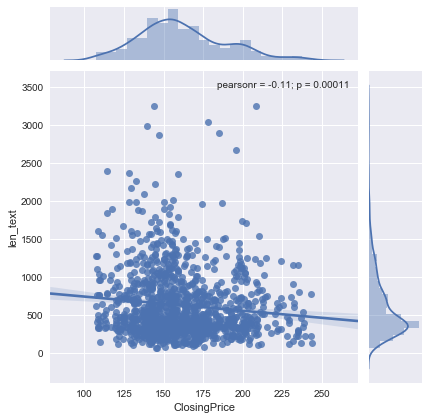

In [43]:
import seaborn as sns
%pylab inline
sns.set()
sns.jointplot(x='ClosingPrice', y='len_text', 
              data=pr, kind='reg');

Посмотрим на корреляцию цены закрытия и количества упоминаний Алексея Миллера. Корреляции нет, коэффициент Пирсона стремится к нулю.

In [160]:
pr['miller'] = pr.text.str.findall('алексе+[а-я]*\sмиллер+[а-я]*|алексе+[а-я]*|миллер+[а-я]*').apply(len)
pr.head()

,date,text,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,len_text,miller
0,11.01.2010,спорный вопрос оплата оказывать период гг услу...,192.50000,194.50,"196,90000","191,00000",59815603,417,0
1,19.01.2010,газпром готовый забирать весь объем азербайджа...,190.10000,189.76,"190,47000","187,36000",48626727,365,2
2,28.01.2010,консорциум глава российский оао газпром нефть ...,183.75000,182.30,"185,98000","181,67000",62561241,521,0
3,01.02.2010,газпром исключать г выпуск облигация примерно ...,184.74000,189.85,"190,40000","183,50000",76298175,215,0
4,03.02.2010,переговоры оао газпром оператор проект сахалин...,194.00000,192.70,"195,27000","192,30000",74730185,186,0


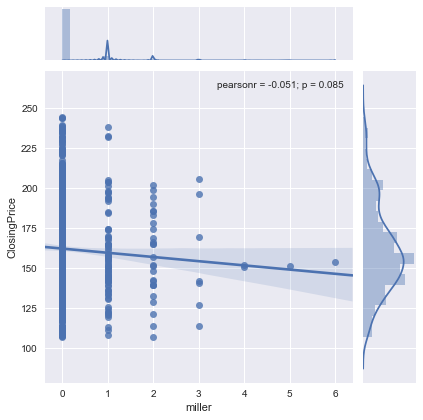

In [54]:
sns.jointplot(x='miller', y='ClosingPrice', 
              data=pr, kind='reg');

Какие санкции упоминаются в тексте

In [213]:
reg = re.compile('[А-Яа-я]*\sсанкци+[а-я]*') 
for i in range(len(df.text)):
    if reg.findall(df.text[i]):
        print(reg.findall(df.text[i]))

['американских санкций']
['за санкций', 'за санкций']
['за санкций', 'за санкций']
['западных санкций']
['ес санкций']
['банкам санкциями', 'банкам санкциями']
['попавшего санкции']
['осложняют санкции']
['находящегося санкциями', 'фоне санкций']
['западных санкций']
['нефть санкциями']
['очередных санкций']
['западные санкции']
['экономическими санкциями']
['за санкций']
['введения санкций', 'введения санкций']
['антироссийскими санкциями']
['персональные санкции']
['риску санкций']
['несмотря санкции']
['условиях санкций']
['ожидает санкции', 'последствия санкций', 'затронутых санкциями']
['штрафные санкции']
['влияния санкций', 'влияния санкций', 'влияния санкций', 'влияния санкций']
['западных санкций', 'западных санкций']
['числе санкциями', 'волну санкций', 'волна санкций', 'развития санкции']
['за санкций']
['за санкций', 'нефти санкции', 'за санкций', 'нефти санкции']
['уверяют санкции', 'секторальных санкций', 'секторальных санкций', 'использовать санкции']
['подпавший санкции

количество упоминаний северного потока

In [150]:
reg = re.compile('северн+[а-я]*\sпоток+[а-я]*') 
j = 0
for i in range(len(df.text)):
    if reg.findall(df.text[i]):
        j += 1
        
print('количество упоминаний северного потока - {}'.format(j))

количество упоминаний северного потока - 12


количество упоминаний турецкого потока

In [151]:
reg = re.compile('туре+[а-я]*\sпоток+[а-я]*') 
j = 0
for i in range(len(df.text)):
    if reg.findall(df.text[i]):
        j += 1
        
print('количество упоминаний турецкого потока - {}'.format(j))

количество упоминаний турецкого потока - 34


бинаризуем цену закрытия

In [161]:
import numpy as np

target = np.array(pr['ClosingPrice'])
target[:10]

array([ 194.5 ,  189.76,  182.3 ,  189.85,  192.7 ,  186.59,  164.45,
        173.77,  169.29,  161.1 ])

In [162]:
def price(s):
    s1 = str(s)
    s = s1.replace(',','.')
    return(float(s))
    
for i in range(1,len(target)):
    if price(target[i-1]) < price(target[i]):
        target[i-1] = 0
    else:
        target[i-1] = 1

target[:10]

array([ 1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.])

In [163]:
target[-1] = 1
target
y = target.astype('int')

разобьем на обучающую и тестовую выборки

In [178]:
X_train_pr = pr[0:1050]
X_train_pr.head()

,date,text,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,len_text,miller
0,11.01.2010,спорный вопрос оплата оказывать период гг услу...,192.50000,194.50,"196,90000","191,00000",59815603,417,0
1,19.01.2010,газпром готовый забирать весь объем азербайджа...,190.10000,189.76,"190,47000","187,36000",48626727,365,2
2,28.01.2010,консорциум глава российский оао газпром нефть ...,183.75000,182.30,"185,98000","181,67000",62561241,521,0
3,01.02.2010,газпром исключать г выпуск облигация примерно ...,184.74000,189.85,"190,40000","183,50000",76298175,215,0
4,03.02.2010,переговоры оао газпром оператор проект сахалин...,194.00000,192.70,"195,27000","192,30000",74730185,186,0


In [179]:
X_test_pr = pr[1050:]
X_test_pr.head()

,date,text,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,len_text,miller
1050,10.01.2017,планировать передавать газпром нефть лицензия ...,191.03000,190.90,"158,02000","154,00000",26146750,565,0
1051,11.01.2017,предполагать ъ новый сервисный компания нск пр...,194.99000,192.95,"158,50000","155,81000",20658180,251,0
1052,13.01.2017,фон улучшение отношение россия турция газовый ...,189.20000,190.70,"158,30000","155,77000",23323000,444,0
1053,17.01.2017,ооо газпром комплектация февраль проводить эле...,174.70000,182.49,"156,50000","153,01000",25918410,1201,0
1054,18.01.2017,газпром накануне рассмотрение апелляция антимо...,173.65000,174.20,"154,59000","152,65000",16216270,411,0


In [180]:
y_train = y[0:1050]
y_test = y[1050:]

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
df1 = vectorizer.fit_transform(pr.text)
X_train = df1[0:1050]
X_test = df1[1050:]

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import *

LogReg = LogisticRegression()
preds = LogReg.fit(X_train, y_train).predict(X_test)

acc = accuracy_score(preds, y_test)
print('accuracy - {}'.format(acc))
print(classification_report(y_test, preds))

accuracy - 0.5045871559633027
             precision    recall  f1-score   support

          0       0.50      0.54      0.52        54
          1       0.51      0.47      0.49        55

avg / total       0.50      0.50      0.50       109

